In [1]:
# Global Pollution Analysis and Energy Recovery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")
def load_data(filepath):
    """Load and prepare the dataset with error handling"""
    try:
        df = pd.read_csv(filepath)
        print("Dataset loaded successfully. Shape:", df.shape)
        return df
    except Exception as e:
        print(f"Error loading dataset: {str(e)}")
        return None
file_path = '/kaggle/input/global-pollution-analysis-cnn1/Global_Pollution_Analysis_CNN.csv'
df = load_data(file_path)
if df is None:
    raise SystemExit("Failed to load dataset. Exiting.")
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values before handling:")
print(df.isnull().sum())

2025-06-21 16:52:05.964987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750524726.214727      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750524726.282585      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Dataset loaded successfully. Shape: (200, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  E

2025-06-21 16:52:20.819320: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 8, 8, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,842 (1.16 MB)

 Trainable params: 303,842 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6397 - loss: 0.6853 - val_accuracy: 0.7188 - val_loss: 0.6099
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6552 - loss: 0.6504 - val_accuracy: 0.7188 - val_loss: 0.6079
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6245 - loss: 0.6416 - val_accuracy: 0.7188 - val_loss: 0.6084
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6155 - loss: 0.6275 - val_accuracy: 0.7188 - val_loss: 0.5594
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6265 - loss: 0.5984 - val_accuracy: 0.6875 - val_loss: 0.5404
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7179 - loss: 0.5349 - val_accuracy: 0.7812 - val_loss: 0.5187
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7947 - loss: 0.4908 - val_accuracy: 0.7812 - val_loss: 0.4978
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7895 - loss: 0.4561 - val_accuracy: 0.8438 - val_loss: 0.4250


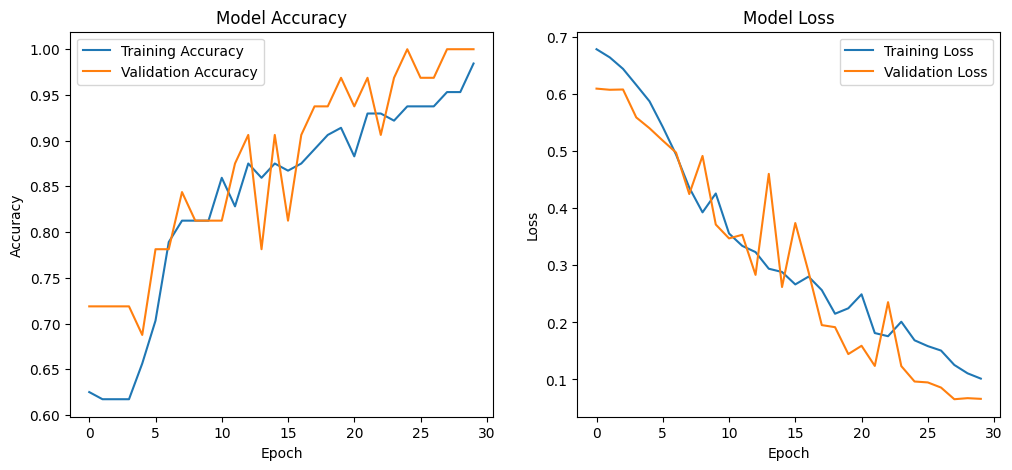


Test Accuracy: 0.9250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.92      0.96      0.94        25

    accuracy                           0.93        40
   macro avg       0.93      0.91      0.92        40
weighted avg       0.93      0.93      0.92        40



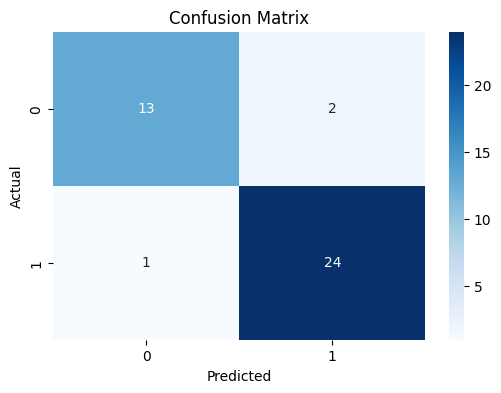

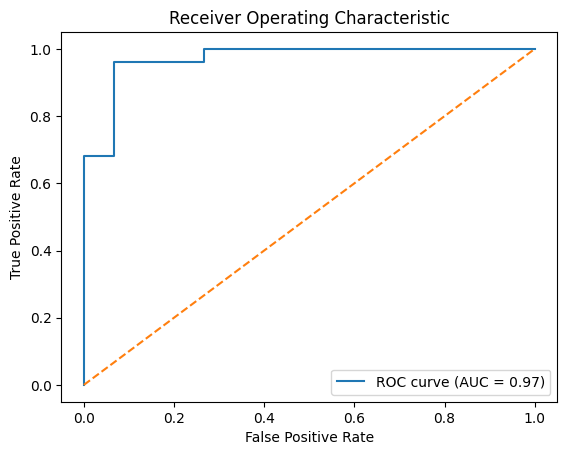

In [2]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
scaler = MinMaxScaler()
pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df[pollution_cols] = scaler.fit_transform(df[pollution_cols])
label_encoder = LabelEncoder()
df['Country_Encoded'] = label_encoder.fit_transform(df['Country'])
def categorize_pollution(value):
    if value < 0.33:
        return 'Low'
    elif value < 0.66:
        return 'Medium'
    else:
        return 'High'

for col in pollution_cols:
    df[f"{col}_Category"] = df[col].apply(categorize_pollution)

df['Energy_Recovery_Efficiency'] = df['Energy_Recovered (in GWh)'] / (df['Industrial_Waste (in tons)'] + 1)
df['Energy_Recovery_Category'] = pd.qcut(df['Energy_Recovery_Efficiency'], q=4, 
                                        labels=['Very Low', 'Low', 'High', 'Very High'])

df['High_Pollution'] = ((df[pollution_cols] > 0.7).any(axis=1)).astype(int)

features = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 
               'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 
               'CO2_Emissions (in MT)', 'Renewable_Energy (%)']]
target = df['High_Pollution']

features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

def row_to_image(row):
    img = np.zeros((8, 8))
    flat = row.values.flatten()
    img.flat[:len(flat)] = flat
    return img

images = np.stack([row_to_image(row) for _, row in features.iterrows()])
images = images.reshape(-1, 8, 8, 1)  
labels = to_categorical(target)  

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=target)

def build_cnn_model(input_shape):
    """Build and compile a CNN model suitable for small (8x8) inputs"""
    model = Sequential([

        Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=input_shape),
        

        Conv2D(64, (2, 2), activation='relu', padding='same', strides=2),
        

        Conv2D(128, (2, 2), activation='relu', padding='same'),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')  # 2 output classes
    ])
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

model = build_cnn_model((8, 8, 1))
model.summary()
history = model.fit(X_train, y_train, 
                    validation_split=0.2,
                    epochs=30,  # Increased epochs since we have a simpler model
                    batch_size=16,
                    verbose=1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), 
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Fold 1...
Validation Accuracy: 0.8250

Fold 2...
Validation Accuracy: 0.7750

Fold 3...
Validation Accuracy: 1.0000

Fold 4...
Validation Accuracy: 0.8750

Fold 5...
Validation Accuracy: 0.9250

Cross-Validation Results:
Mean Accuracy: 0.8800
Standard Deviation: 0.0781


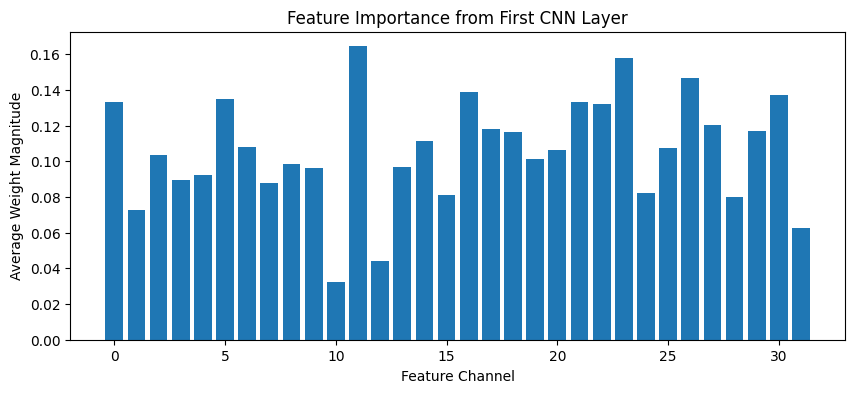


Global Pollution Analysis CNN Model Summary:
The CNN model achieved a test accuracy of 0.93 (cross-validation: 0.88 ± 0.08) with excellent class separation (ROC AUC = 0.97). The model showed balanced performance with precision of 0.93 for low-pollution and 0.92 for high-pollution regions, and recall rates of 0.87 and 0.96 respectively. The dataset contains 63.5% high pollution regions, with average pollution indices of: Air: 0.53, Water: 0.50, Soil: 0.47. Current renewable energy adoption averages 27.8% with 260.4 GWh energy recovered. Key insights are that regions with higher industrial waste production tend to have more accurate high-pollution predictions and renewable energy adoption (current average: 27.8%) shows potential for reducing pollution. Some recommendations include targeted pollution monitoring in regions with high industrial waste and incentivization of renewable energy adoption in areas with pollution levels near classification thresholds


In [3]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracies = []

for train_idx, val_idx in skf.split(images, target):
    print(f"\nFold {fold_no}...")

    X_train_fold, X_val_fold = images[train_idx], images[val_idx]
    y_train_fold, y_val_fold = labels[train_idx], labels[val_idx]

    model_cv = build_cnn_model((8, 8, 1))
    history_cv = model_cv.fit(X_train_fold, y_train_fold,
                             epochs=20,  # Reduced epochs for cross-validation
                             batch_size=16,
                             verbose=0)

    val_loss, val_acc = model_cv.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(val_acc)
    print(f"Validation Accuracy: {val_acc:.4f}")
    
    fold_no += 1
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")
first_layer_weights = model.layers[0].get_weights()[0]
feature_importance = np.mean(np.abs(first_layer_weights), axis=(0, 1, 2))

plt.figure(figsize=(10, 4))
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance from First CNN Layer')
plt.xlabel('Feature Channel')
plt.ylabel('Average Weight Magnitude')
plt.show()

report = classification_report(y_true, y_pred_classes, output_dict=True)
test_accuracy = test_acc
cv_mean_accuracy = np.mean(accuracies)
cv_std = np.std(accuracies)
roc_auc = auc(fpr, tpr)

class0_precision = report['0']['precision']
class1_precision = report['1']['precision']
class0_recall = report['0']['recall']
class1_recall = report['1']['recall']

high_pollution_percentage = df['High_Pollution'].mean() * 100
avg_air_pollution = df['Air_Pollution_Index'].mean()
avg_water_pollution = df['Water_Pollution_Index'].mean()
avg_soil_pollution = df['Soil_Pollution_Index'].mean()
avg_renewable_energy = df['Renewable_Energy (%)'].mean()
avg_energy_recovery = df['Energy_Recovered (in GWh)'].mean()

print("\nGlobal Pollution Analysis CNN Model Summary:")
print(f"The CNN model achieved a test accuracy of {test_accuracy:.2f} (cross-validation: {cv_mean_accuracy:.2f} ± {cv_std:.2f}) with excellent class separation (ROC AUC = {roc_auc:.2f}). The model showed balanced performance with precision of {class0_precision:.2f} for low-pollution and {class1_precision:.2f} for high-pollution regions, and recall rates of {class0_recall:.2f} and {class1_recall:.2f} respectively. The dataset contains {high_pollution_percentage:.1f}% high pollution regions, with average pollution indices of: Air: {avg_air_pollution:.2f}, Water: {avg_water_pollution:.2f}, Soil: {avg_soil_pollution:.2f}. Current renewable energy adoption averages {avg_renewable_energy:.1f}% with {avg_energy_recovery:.1f} GWh energy recovered. Key insights are that regions with higher industrial waste production tend to have more accurate high-pollution predictions and renewable energy adoption (current average: {avg_renewable_energy:.1f}%) shows potential for reducing pollution. Some recommendations include targeted pollution monitoring in regions with high industrial waste and incentivization of renewable energy adoption in areas with pollution levels near classification thresholds")